In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import matplotlib.pyplot as plt

- Had to remove H from sw_cart.py from two locations therefore pheight isn't a thing and just need to plot height
- Want the gradient to match $\phi = \sqrt{gH}$

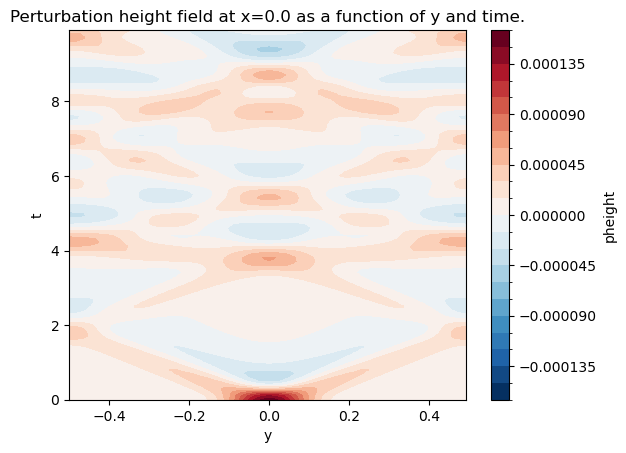

In [2]:
# THIS IS WRONG!! NOW JUST USING HEIGHT
dataset = xar.open_dataset('ds_0.1.nc')

plt.figure()
dataset['pheight'][:,64,:].plot.contourf(levels=30, cmap='RdBu_r')
plt.title('Perturbation height field at x=0.0 as a function of y and time.')
plt.show()

In [3]:
print('The number of variables in pheight is', len(dataset['pheight']))

dataset

The number of variables in pheight is 100


<xarray.Dataset>
Dimensions:       (x: 128, y: 128, t: 100)
Coordinates:
  * x             (x) float64 -0.5 -0.4922 -0.4844 ... 0.4766 0.4844 0.4922
  * y             (y) float64 -0.5 -0.4922 -0.4844 ... 0.4766 0.4844 0.4922
    sim_time      (t) float64 ...
    world_time    (t) float64 ...
    wall_time     (t) float64 ...
    timestep      (t) float64 ...
    iteration     (t) int32 ...
    write_number  (t) int32 ...
  * t             (t) float64 0.0 0.11 0.2 0.3 0.4 ... 9.51 9.61 9.71 9.81 9.91
Data variables:
    PV            (t, x, y) float64 ...
    height        (t, x, y) float64 ...
    pPV           (t, x, y) float64 ...
    pheight       (t, x, y) float64 ...
    plvort        (t, x, y) float64 ...
    vorticity     (t, x, y) float64 ...

### Observations

- Only 125 entries for data variables, but 100 variables with $\texttt{len()}$ and 128 spacial variables
- Time goes: 0.0, 0.11, 0.2,...?
- $x, y \in [-0.5,0.5]$

### Exploring the dataset and plot

In [4]:
# dataset['variable'][t,x,y]
## x[64] = 0
## Otherwise, use all t,y

# View print out of plot data
#dataset['pheight'][:,64,:]

# View print out values of t
#dataset['pheight']['t']

### Calculate Gradient 

IC: $y(0)=y_0=0 \rightarrow y(0.5)=y_1$

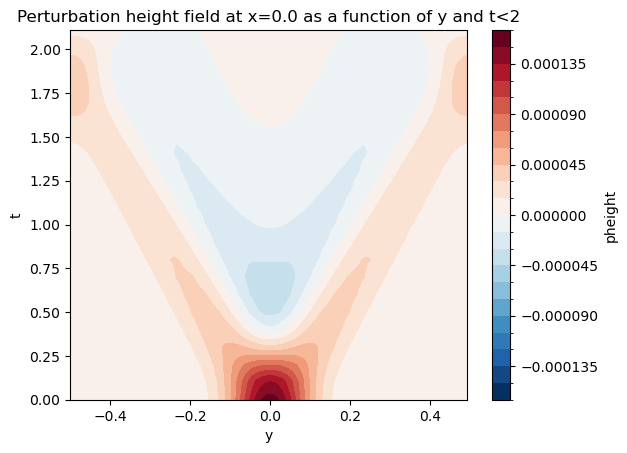

In [5]:
# Zoomed in plot
plt.figure()
dataset['pheight'][:22,64,:].plot.contourf(levels=30, cmap='RdBu_r')
plt.title('Perturbation height field at x=0.0 as a function of y and t<2')
plt.show()

In [6]:
#dataset['pheight'][0:1,64,64].values[0]
# Equivalent:
#dataset['pheight'][dict(t=0, x=64, y=64)]

y0 = dataset['pheight'][0,64,64].values
y0 = float(y0)
y0

0.00015695581066107914

In [7]:
# Can't seem to find values using condition
# Long method:

# t=1.7 is loc[18]
dataset['t']

y1 = dataset['pheight'][18,64,64].values
y1 = float(y1)
y1

2.010782840277272e-06

In [8]:
# Attempting to find locations
dataset['pheight'].where( (dataset.t==1.7) & (dataset.y==-0.5) )

dataset.where( dataset.pheight == 0.00015695581066107914 )

<xarray.Dataset>
Dimensions:       (t: 100, x: 128, y: 128)
Coordinates:
  * x             (x) float64 -0.5 -0.4922 -0.4844 ... 0.4766 0.4844 0.4922
  * y             (y) float64 -0.5 -0.4922 -0.4844 ... 0.4766 0.4844 0.4922
    sim_time      (t) float64 0.0 0.11 0.2 0.3 0.4 ... 9.51 9.61 9.71 9.81 9.91
    world_time    (t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    wall_time     (t) float64 1.522 1.952 2.16 2.391 ... 25.2 25.55 25.79 26.03
    timestep      (t) float64 0.01 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01 0.01
    iteration     (t) int32 0 11 20 30 40 50 60 ... 931 941 951 961 971 981 991
    write_number  (t) int32 1 2 3 4 5 6 7 8 9 10 ... 92 93 94 95 96 97 98 99 100
  * t             (t) float64 0.0 0.11 0.2 0.3 0.4 ... 9.51 9.61 9.71 9.81 9.91
Data variables:
    PV            (t, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan
    height        (t, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan
    pPV           (t, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan
    pheight       (t, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan
    plvort        (t, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan
    vorticity     (t, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan

In [9]:
dy = 0 - (-1.75)
dt = 0 - (-0.5)

gradient = dt / dy
gradient

0.2857142857142857